In [1]:
import geopandas as gpd

In [2]:
import numpy as np

# Cluster Sampling

In [3]:
from cluster_sampling import ClusterSampler

[Init] Initializing ClusterSampler...
[Stratify] Stratifying points by column: pc11_s_id
[Stratify] Unique strata found: ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '14' '18' '19'
 '20' '21' '22' '23' '24' '25' '27' '28' '29' '30' '33' '34' '16' '17']
[Init] Found 28 strata.
Num Strata total: 28
[Sample] Starting sampling process...
[Determine Sample Sizes] Total desired sample size: 1000
[Determine Sample Sizes] Selected strata: ['08' '09' '33' '11' '25' '06' '01' '21' '23' '04']
[Determine Sample Sizes] Final sample size per stratum:
{'08': 240, '09': 213, '33': 101, '11': 2, '25': 0, '06': 40, '01': 26, '21': 153, '23': 225, '04': 0}
[Sample] Processing stratum: 08
[Sample] Processing stratum: 09
[Sample] Processing stratum: 33
[Sample] Processing stratum: 11
[Sample Clusters] No points returned.
[Sample] Processing stratum: 25
[Sample] Processing stratum: 06
[Sample] Processing stratum: 01
[Sample] Processing stratum: 21
[Sample] Processing stratum: 23
[Sample] Processi

/home/libe2152/optimizedsampling/2_initial_sample/cluster_sampling.py:208: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_sampled = pd.concat(all_sampled).reset_index(drop=True)
/home/libe2152/optimizedsampling/2_initial_sample/cluster_sampling.py:312: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower left', fontsize=10)
/home/libe2152/optimizedsampling/2_initial_sample/cluster_sampling.py:312: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='

Saved plot to /home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/cluster_sampling/fixedstrata_01-04-06-08-09-11-21-23-25-33/plots/sample_state_district_20ppc_960_size_seed_1.png
[Reset Sample] Clearing previous sample state...
[Sample] Starting sampling process...
[Determine Sample Sizes] Total desired sample size: 1000
[Determine Sample Sizes] Selected strata: ['08' '09' '33' '11' '25' '06' '01' '21' '23' '04']
[Determine Sample Sizes] Final sample size per stratum:
{'08': 240, '09': 213, '33': 101, '11': 2, '25': 0, '06': 40, '01': 26, '21': 153, '23': 225, '04': 0}
[Sample] Processing stratum: 08
[Sample] Processing stratum: 09
[Sample] Processing stratum: 33
[Sample] Processing stratum: 11
[Sample Clusters] No points returned.
[Sample] Processing stratum: 25
[Sample] Processing stratum: 06
[Sample] Processing stratum: 01
[Sample] Processing stratum: 21
[Sample] Processing stratum: 23
[Sample] Processing stratum: 04
[Sample] Sampling complete. Total points sampled: 9

/home/libe2152/optimizedsampling/2_initial_sample/cluster_sampling.py:208: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_sampled = pd.concat(all_sampled).reset_index(drop=True)


KeyboardInterrupt: 

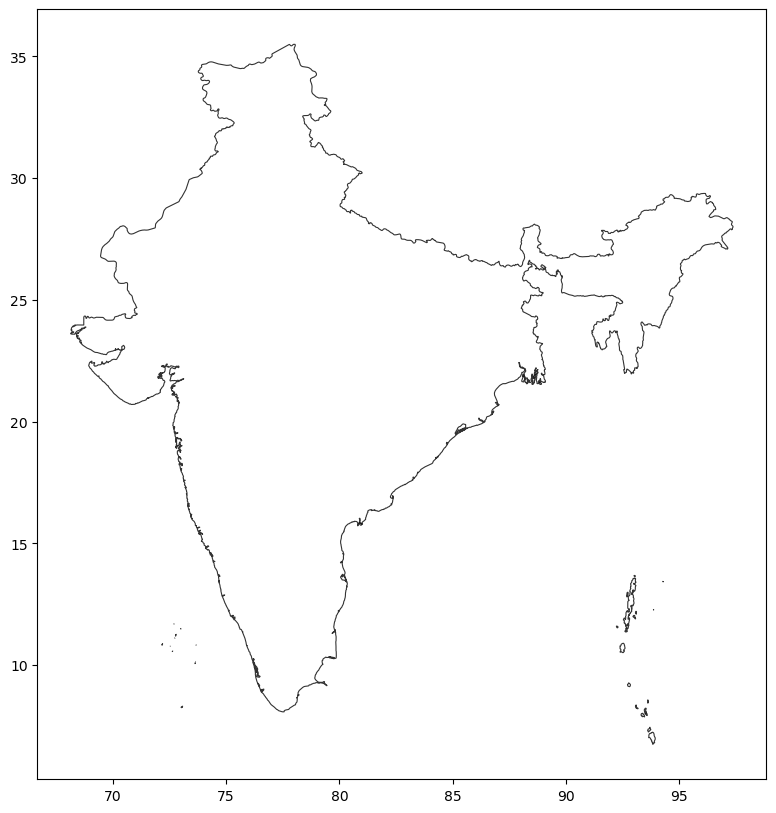

In [ ]:
ADMIN_IDS = {
    'pc11_s_id': 'state',
    'pc11_d_id': 'district',
    'pc11_sd_id': 'subdistrict'
}

data_path = "/share/india_secc/MOSAIKS/train_shrugs_with_admins.geojson"
gdf = gpd.read_file(data_path)

country_shape_file = '/home/libe2152/optimizedsampling/0_data/boundaries/world/ne_10m_admin_0_countries.shp'
country_name = 'India'

strata_col = 'pc11_s_id'
cluster_col = 'pc11_d_id'

out_path = f'/home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/cluster_sampling'

sampler = ClusterSampler(gdf, id_col='condensed_shrug_id', strata_col=strata_col, cluster_col=cluster_col, ADMIN_IDS=ADMIN_IDS)

n_strata = 10
all_strata = gdf[strata_col].astype(str).unique()
print(f"Num Strata total: {len(all_strata)}")

np.random.seed(78910)
fixed_strata = np.random.choice(all_strata, size=n_strata, replace=False)

for points_per_cluster in [20, 30, 50]:
    sampler.cluster_col = cluster_col
    for total_sample_size in range(1000, 6000, 1000):
        
        for seed in [1, 42, 123, 456, 789, 1234, 5678, 9101, 1213, 1415]:
            try:
                sampler.sample(total_sample_size, points_per_cluster, seed, fixed_strata=fixed_strata)
                sampler.save_sampled_ids(out_path)
                sampler.plot(country_shape_file=country_shape_file, country_name=country_name)
            except Exception as e:
                print(e)
                from IPython import embed; embed()
            sampler.reset_sample()

# Convenience Sampling

In [ ]:
from infrastructure_convenience_sampling import UrbanConvenienceSampler

In [ ]:
ADMIN_IDS = {
    'pc11_s_id': 'state',
    'pc11_d_id': 'district',
    'pc11_sd_id': 'subdistrict'
}

id_col = 'condensed_shrug_id'
gdf_path = '/share/india_secc/MOSAIKS/train_shrugs_with_admins.geojson'
pop_col = 'pc11_pca_tot_p_combined'
country_shape_file = '/home/libe2152/optimizedsampling/0_data/boundaries/world/ne_10m_admin_0_countries.shp'
country_name = 'India'
out_path = f'/home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling'

print("Reading GeoDataFrame...")
gdf = gpd.read_file(gdf_path)

method = 'probabilistic'
temp=0.025
for n_urban in [20, 50]:
    distances_dir = f'/home/libe2152/optimizedsampling/0_data/distances/india_secc/distance_to_top{n_urban}_urban.pkl'
    for desired_sample_size in range(1000, 6000, 1000):
        for seed in [1, 42, 123, 456, 789, 1234, 5678, 9101, 1213, 1415]:

            print("Initializing UrbanConvenienceSampler...")
            sampler = UrbanConvenienceSampler(
                id_col=id_col,
                gdf_points=gdf,
                gdf_urban=gdf,
                n_urban=n_urban,
                pop_col=pop_col,
                distances_dir=distances_dir
            )

            sampler.sample(n_samples=desired_sample_size, method=method, temp=temp, seed=seed)
            sampler.save_sampled_ids(out_path)
            sampler.plot(country_shape_file=country_shape_file, country_name=country_name)

In [ ]:
ADMIN_IDS = {
'pc11_s_id': 'state',
'pc11_d_id': 'district',
'pc11_sd_id': 'subdistrict'
}

cluster_col = 'pc11_d_id'
# or another appropriate cluster ID
id_col="id"
id_col = 'condensed_shrug_id'

for points_per_cluster in [20, 30, 50]:
    gdf_path = '/share/india_secc/MOSAIKS/train_shrugs_with_admins.geojson'
    gdf = gpd.read_file(gdf_path)

    for n_urban in [10, 20, 50]:
        pop_col = 'pc11_pca_tot_p_combined'

        distances_dir = f'/home/libe2152/optimizedsampling/0_data/distances/india_secc/distance_to_top{n_urban}_urban.pkl'
        cluster_distances_dir = f'/home/libe2152/optimizedsampling/0_data/distancesindia_secc/cluster_distance_to_top{n_urban}_urban.pkl'

        country_shape_file = '/home/libe2152/optimizedsampling/0_data/boundaries/world/ne_10m_admin_0_countries.shp'
        country_name = 'India'

        out_path = f'/home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling'

        method = 'probabilistic'
        temp = 0.025

        for desired_sample_size in range(1000, 6000, 1000):
            for seed in [1, 42, 123, 456, 789, 1234, 5678, 9101, 1213, 1415]:
                # Cluster Convenience Sampler (NEW)
                print("Initializing ClusterConvenienceSampler...")
                sampler = UrbanConvenienceSampler(  # make sure you have this class
                    gdf_points=gdf,
                    id_col=id_col,
                    pop_col=pop_col,
                    cluster_col=cluster_col,
                    points_per_cluster=points_per_cluster,
                    gdf_urban=gdf,
                    n_urban=n_urban,
                    distances_dir=distances_dir,
                    cluster_distances_dir=cluster_distances_dir,
                    admin_ids=ADMIN_IDS
                )

                sampler.sample_by_clusters(
                    total_sample_size=desired_sample_size,
                    method=method,
                    temp=temp,
                    seed=seed
                )
                sampler.save_sampled_ids(out_path)
                sampler.plot(country_shape_file=country_shape_file, country_name=country_name)

# Random Sampling

In [ ]:
from random_sampling import RandomSampler

In [ ]:
data_path = "/share/india_secc/MOSAIKS/train_shrugs_with_admins.geojson"
gdf = gpd.read_file(data_path)

out_path = f'/home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/random_sampling'

country_shape_file = '/home/libe2152/optimizedsampling/0_data/boundaries/world/ne_10m_admin_0_countries.shp'
country_name = 'India'

sampler = RandomSampler(gdf, id_col="condensed_shrug_id")

for total_sample_size in range(1000, 6000, 1000):
    for seed in [1, 42, 123, 456, 789, 1234, 5678, 9101, 1213, 1415]:
        sampler.sample(total_sample_size=total_sample_size, seed=seed)
        sampler.save_sampled_ids(out_path)
        sampler.plot(country_shape_file=country_shape_file, country_name=country_name)
        sampler.reset_sample()